# Import Data


In [104]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [106]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset/')
# Find all CSV and XLS files in the directory and its subdirectories
csv = list(directory.rglob('*.csv'))
xls = list(directory.rglob('*.xls'))

files = csv + xls


In [107]:
# import urllib.parse
# dataset_repo = "https://github.com/kittizz/water_quality_data_collection/raw/main/"
csv_files = list()
xls_files = list()
for index in range(len(files)):
    file = files[index]
    if "63" in file.name:
        # if file.name.endswith(".csv"):
        #     csv_files.append(dataset_repo+urllib.parse.quote(str(file)))
        # if file.name.endswith(".xls"):
        #     xls_files.append(dataset_repo+urllib.parse.quote(str(file)))

        if file.name.endswith(".csv"):
            csv_files.append(str(file))
        if file.name.endswith(".xls"):
            xls_files.append(str(file))


In [108]:
df1 = pd.concat([pd.read_csv(f, encoding='utf-8')
                 for f in csv_files])
df2 = pd.concat([pd.read_excel(f)
                 for f in xls_files])

df_concat = pd.concat([df1, df2], axis=0)


# Preprocessing - Data Cleaning


In [109]:
df_concat.shape

(418131, 11)

In [110]:
df_concat

,สถานี,วันที่-เวลา,pH,DO,EC,Temp,หมายเลข,Salinity,Turbidity,BOD,COD
0,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:00,-,2.300,464.700,28.3,NaN,NaN,NaN,NaN,NaN
1,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:30,-,2.300,463.100,28.3,NaN,NaN,NaN,NaN,NaN
2,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:00,-,2.300,464.200,28.3,NaN,NaN,NaN,NaN,NaN
3,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:30,-,2.300,466.700,28.3,NaN,NaN,NaN,NaN,NaN
4,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 02:00,-,2.300,468.200,28.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10215,NaN,31 ก.ค.2563 21:30,8.1,4.9,238.2,30.7,222.0,0.1,,NaN,NaN
10216,NaN,31 ก.ค.2563 22:00,8.1,4.9,237.4,30.7,222.0,0.1,,NaN,NaN
10217,NaN,31 ก.ค.2563 22:30,8.1,4.9,236.7,30.7,222.0,0.1,,NaN,NaN
10218,NaN,31 ก.ค.2563 23:00,8.1,4.9,237.5,30.7,222.0,0.1,,NaN,NaN


In [111]:
df = df_concat.copy()

In [112]:
df.columns

Index(['สถานี ', 'วันที่-เวลา', 'pH', 'DO', 'EC', 'Temp', 'หมายเลข',
       'Salinity', 'Turbidity', 'BOD', 'COD'],
      dtype='object')

## missing value


In [113]:
# ตรวจสอบ missing value
df.isnull().sum()

สถานี          352596
วันที่-เวลา         0
pH                  0
DO                  0
EC                  0
Temp                0
หมายเลข         65535
Salinity       181163
Turbidity      249931
BOD            341389
COD            341389
dtype: int64

In [114]:
# เลือกเฉพาะ columns  'pH', 'DO', 'EC', 'Temp', 'Salinity', 'Turbidity', 'BOD', 'COD'
df = df[['pH', 'DO', 'EC', 'Temp',
         'Salinity', 'Turbidity', 'BOD', 'COD']]

In [115]:
# ตรวจสอบจำนวน missing value
df.isna().sum()

pH                0
DO                0
EC                0
Temp              0
Salinity     181163
Turbidity    249931
BOD          341389
COD          341389
dtype: int64

In [116]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [117]:
# ตรวจสอบจำนวน missing value
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [118]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [119]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [120]:
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [121]:
# เปลี่ยนชนิดข้อมูลให้เป็น float
df = df.astype(float)

# เปลี่ยนชนิดข้อมูลให้ pH เป็น int
df['pH'] = df['pH'].astype(int)

In [122]:
# reset index
df = df.reindex()

## Outlier data


In [123]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,pH,DO,EC,Temp,Salinity,Turbidity,BOD,COD
count,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000
mean,6.741568,3.923606,492.453324,31.273579,0.213194,67.363992,3.440693,15.690165
std,1.984977,2.733238,386.136457,2.397737,0.167600,97.597600,4.871939,11.265693
min,1.000000,0.020000,1.000000,23.365900,0.010000,0.900000,0.400000,1.000000
25%,6.000000,2.109625,283.300000,29.700000,0.120000,19.000000,1.189000,7.180000
50%,7.000000,3.400000,405.384500,31.487900,0.180000,42.100000,2.500000,16.950000
75%,8.000000,4.900000,548.000000,32.800000,0.240000,61.081600,3.490000,20.500000
max,10.000000,19.350000,2043.670000,40.900000,0.930000,1533.400000,51.300000,101.900000


<Axes: >

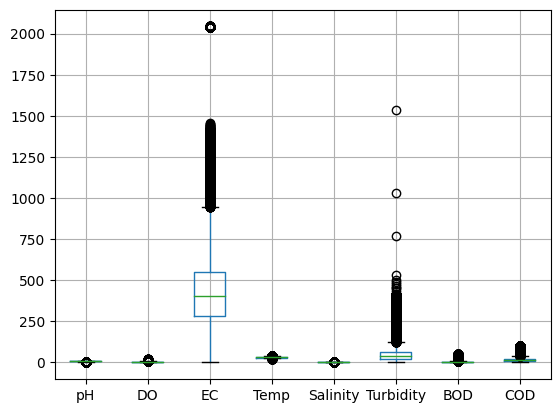

In [124]:
df.boxplot()

จัดการ outlier data


In [125]:
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        dataframe = dataframe[(dataframe[column] >= lower_bound) & (
            dataframe[column] <= upper_bound)]
    return dataframe


In [126]:
# DO	EC	Temp	Salinity	Turbidity	BOD	COD
df_out = df.copy()

df_out = remove_outliers_iqr(df_out, ['pH', 'DO', 'EC', 'Temp',
                                      'Salinity', 'Turbidity', 'BOD', 'COD'])

<Axes: >

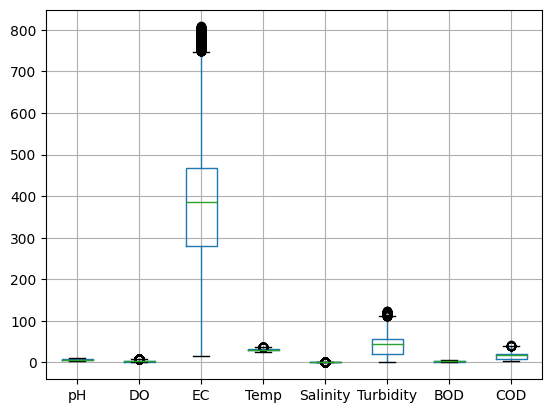

In [127]:
df_out.boxplot()

## Duplicate data


In [128]:
print('จำนวน Duplicate Data df:', df.duplicated().sum())

จำนวน Duplicate Data df: 146


In [129]:
# ลบ Duplicate Data
df = df.drop_duplicates()

# Data Transformation: Normalization


In [130]:
X_columns = ['DO', 'EC', 'Temp',
             'Salinity', 'Turbidity', 'BOD', 'COD']


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[X_columns])


MinMaxScaler()

In [132]:
df_split_copy = df.copy()


## แบ่งชุดข้อมูล


In [133]:
# seed สุ่มข้อมูล
seed = 5712
# แบ่งชุดข้อมูลออกเป็น test
df_split, df_test = train_test_split(
    df_split_copy, test_size=0.001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  training
df_train = df_split

In [134]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 44210
จำนวนชุดข้อมูล training : 44165
จำนวนชุดข้อมูล test : 45


In [135]:
# แยก X,Y
X_train = df_train[X_columns]
Y_train = df_train['pH'].values.ravel()

X_test = df_test[X_columns]
Y_test = df_test['pH'].values.ravel()


## Transform


In [136]:
X_train_transform = scaler.transform(X_train)

X_test_transform = scaler.transform(X_test)


# KNN


In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# สร้างโมเดล KNNC
model = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

## Evaluating Model KNNC


In [138]:

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"KNNC Accuracy: {accuracy}")
mean = mean_squared_error(Y_test, Y_pred)
print(f"Decision Tree MAE: {mean}")

KNNC Accuracy: 0.8444444444444444
Decision Tree MAE: 0.4


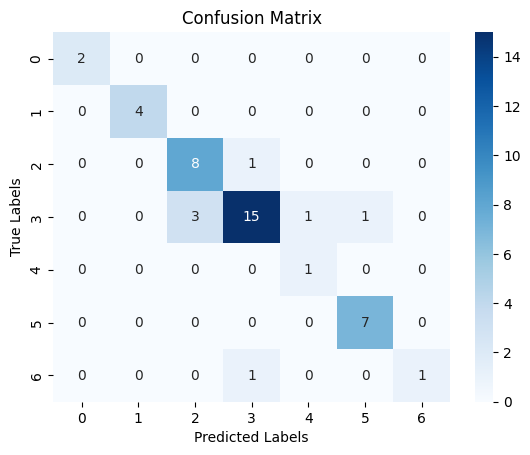

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Naive bayes


In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [141]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

## Evaluating Model Naive bayes


In [142]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")

mean = mean_squared_error(Y_test, Y_pred)
print(f"Naive Bayes MAE: {mean}")

Naive Bayes Accuracy: 0.4
Naive Bayes MAE: 2.4


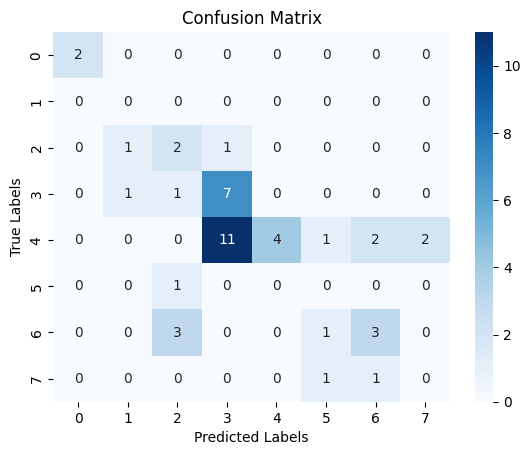

In [143]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree


In [144]:
from sklearn.tree import DecisionTreeClassifier


# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test_transform)

## Evaluating Model Decision Tree


In [145]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")

mean = mean_squared_error(Y_test, Y_pred)
print(f"Decision Tree MAE: {mean}")

Decision Tree Accuracy: 0.8666666666666667
Decision Tree MAE: 0.3111111111111111


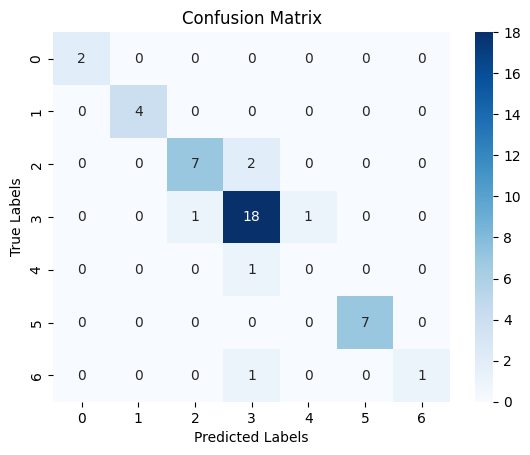

In [146]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()